In [0]:
!pip install google_images_download

In [0]:
import os

In [0]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation

arguments = {"keywords":"Polar bears,Black bear,Sloth Bear,Giant Panda,Brown Bear,Sun Bear","limit":100,"print_urls":True}   #creating list of arguments
paths = response.download(arguments)   #passing the arguments to the function
print(paths)

In [0]:
def change_name(path, folder):
  pwd = os.getcwd()
  source = f'{path}/{folder}'
  for i, f in enumerate(os.listdir(source)):
    name, ext = os.path.splitext(f'{pwd}/{source}/{f}')
    os.rename(f'{pwd}/{source}/{f}', f'{pwd}/{source}/{i}.jpg')

In [0]:
classes = "Polar bears,Black bear,Sloth Bear,Giant Panda,Brown Bear,Sun Bear".split(',')
path ='downloads/'

In [0]:
for c in classes:
  change_name(path, c)

In [12]:
for c in classes:
  verify_images(f'{path}{c}', delete=True, max_workers=8)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='downloads/Brown Bear/8.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [0]:
from fastai.vision import *

In [3]:
path = Path('downloads')
path.ls()

[PosixPath('downloads/cleaned.csv'),
 PosixPath('downloads/Black bear'),
 PosixPath('downloads/Sloth Bear'),
 PosixPath('downloads/Brown Bear'),
 PosixPath('downloads/models'),
 PosixPath('downloads/Giant Panda'),
 PosixPath('downloads/Polar bears'),
 PosixPath('downloads/Sun Bear')]

In [0]:
bs = 64
sz = 224
arch = models.resnet34

In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=tfms, size=sz, num_workers=4)
data = data.normalize(imagenet_stats)

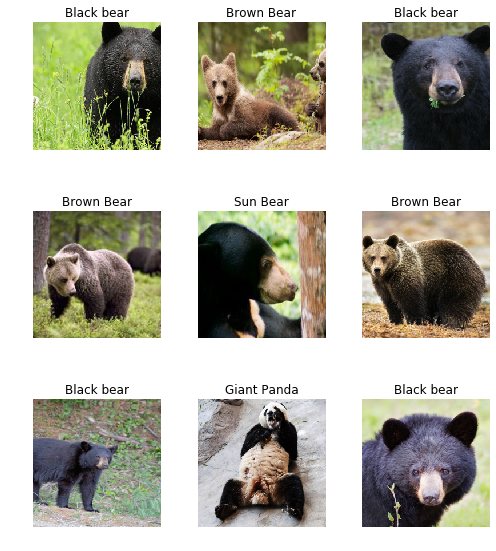

In [17]:
data.show_batch(rows=3, figsize=(7, 8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Black bear',
  'Brown Bear',
  'Giant Panda',
  'Polar bears',
  'Sloth Bear',
  'Sun Bear'],
 6,
 472,
 117)

In [19]:
learn = cnn_learner(data, arch, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:02, 38041253.64it/s]


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.800888,0.620209,0.162393,0.837607,00:33
1,1.064528,0.176906,0.076923,0.923077,00:33
2,0.750666,0.143335,0.051282,0.948718,00:33
3,0.577395,0.146467,0.059829,0.940171,00:32


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


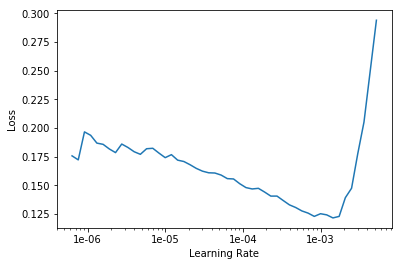

In [24]:
learn.recorder.plot()

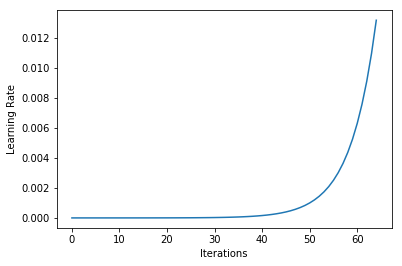

In [25]:
learn.recorder.plot_lr()

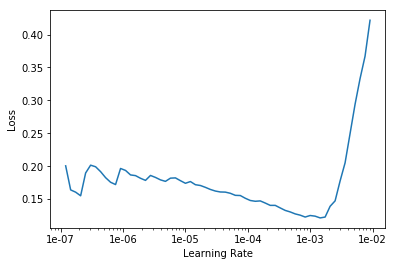

In [26]:
learn.recorder.plot(skip_start=1, skip_end=2)

In [27]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.151549,0.146126,0.076923,0.923077,00:32
1,0.149969,0.145846,0.076923,0.923077,00:31


In [28]:
learn.fit_one_cycle(2, max_lr=slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.143499,0.144503,0.051282,0.948718,00:33
1,0.119636,0.142523,0.042735,0.957265,00:34


In [29]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.117106,0.120332,0.042735,0.957265,00:32
1,0.091294,0.106547,0.042735,0.957265,00:33


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

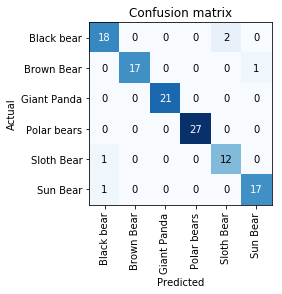

In [33]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(ds, idxs, path)

In [0]:
df = pd.read_csv(path/'cleaned.csv', header='infer')

In [6]:
db = (ImageList.from_df(df, path)
                    .split_none()
                    .label_from_df()
                    .databunch(bs=64))

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:269: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 3071, 3000]), torch.Size([3, 363, 647]), torch.Size([3, 405, 540]), torch.Size([3, 165, 220]), torch.Size([3, 1851, 2560]), torch.Size([3, 274, 527]), torch.Size([3, 900, 1600]), torch.Size([3, 3939, 2200]), torch.Size([3, 375, 281]), torch.Size([3, 370, 710]), torch.Size([3, 960, 1280]), torch.Size([3, 200, 300]), torch.Size([3, 451, 600]), torch.Size([3, 2552, 3192]), torch.Size([3, 800, 1920]), torch.Size([3, 1024, 945]), torch.Size([3, 389, 509]), torch.Size([3, 1067, 1600]), torch.Size([3, 300, 216]), torch.Size([3, 2112, 3000]), torch.Size([3, 690, 1024]), torch.Size([3, 370, 470]), torch.Size([3, 500, 1200]), torch.Size([3, 372, 496]), torch.Size([3, 2539, 3845]), torch.Size([3, 525, 700]), torch.Size([3, 681, 968]), torch.Size([3, 325, 480]), torch.Size([3, 768, 1360]), torch.Size([

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

# learn_cln.load('stage-2');

In [0]:
# ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
learn_cln.unfreeze()

In [0]:
learn_cln.lr_find()

In [0]:
learn_cln.recorder.plot()